<a href="https://colab.research.google.com/github/Mayakshanesht/Autonomous_Driving_Lecture_resources/blob/main/MPC_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

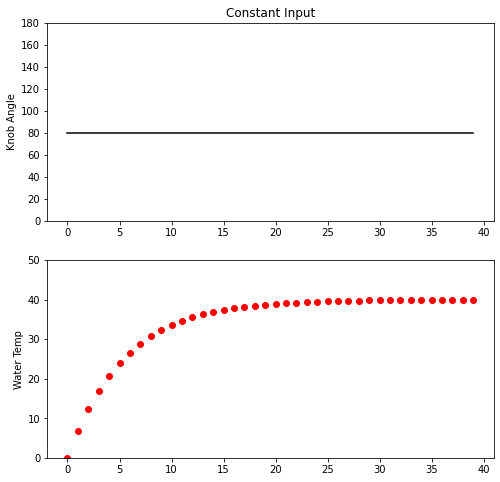

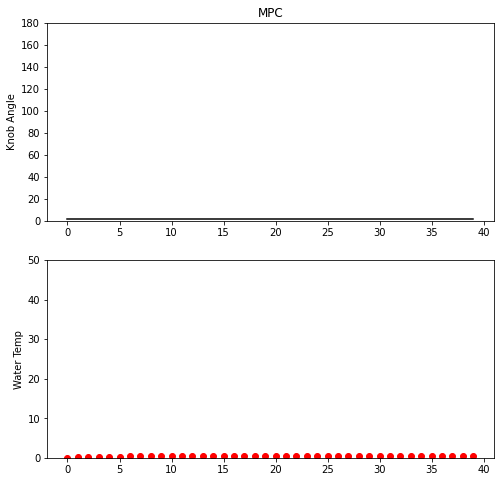

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

class ModelPredictiveControl:
    def __init__(self):
        self.horizon = 40

    def plant_model(self, u, prev_temp):
        knob_angle = u
        # Knob angle to temperature
        knob_temp = knob_angle * 0.5
        # Calculate dT or change in temperature.
        tau = 6
        dT = (knob_temp-prev_temp)/tau
        # new temp = current temp + change in temp.
        return prev_temp + dT

    def cost_function(self, u):
        cost = 0.0
        temp = 0.0
        for i in range(0, self.horizon):
            temp = self.plant_model(u[i], temp)
            cost += cost+ abs(40- temp)
        return cost


mpc = ModelPredictiveControl()

# Set bounds.
bounds = []
for i in range(mpc.horizon):
    bounds += [[0, 180]]

# Create Inputs to be filled.
u = np.ones(mpc.horizon)

# Non-linear optimization.
u_solution = minimize(mpc.cost_function,
                      x0=u,
                      method='SLSQP',
                      bounds=bounds,
                      tol = 1e-8)



# --------------------------
# Calculate data for Plot 1.
knob_angle_list = []
water_temp_list = []
t_list = []
knob_angle = 80
water_temp = 0.0
for t in range(40):
    t_list += [t]
    knob_angle_list += [knob_angle]
    water_temp_list += [water_temp]
    water_temp = mpc.plant_model(knob_angle, water_temp)

# Create Plot 1 - Constant Input
# Subplot 1
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("Constant Input")
plt.ylabel("Knob Angle")
# Enter Data
plt.plot(t_list, knob_angle_list, 'k')
plt.ylim(0,180)

# Subplot 2
plt.subplot(212)
plt.ylabel("Water Temp")
# Enter Data
plt.plot(t_list, water_temp_list, 'ro')
plt.ylim(0,50)
plt.show()

# --------------------------
# Calculate data for Plot 2.
knob_angle_list = []
water_temp_list = []
t_list = []
water_temp = 0.0
for t in range(40):
    t_list += [t]
    knob_angle = u_solution.x[t]
    knob_angle_list += [knob_angle]
    water_temp_list += [water_temp]
    water_temp = mpc.plant_model(knob_angle, water_temp)

# Plot 2 - MPC
# Subplot 1
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title("MPC")
plt.ylabel("Knob Angle")
# Enter data
plt.plot(t_list, knob_angle_list, 'k')
plt.ylim(0,180)

# Subplot 2
plt.subplot(212)
plt.ylabel("Water Temp")
# Enter data
plt.plot(t_list, water_temp_list, 'ro')
plt.ylim(0,50)
plt.show()